- OpenClassrooms Project 6, Data Scientist
- Author : Oumeima EL GHARBI
- Date : October, November 2022

### Importing libraries

In [1]:
%reset -f

import warnings
warnings.filterwarnings(action="ignore") # once

# to compute time of pipeline
from time import time, strftime, gmtime

# NLP
import nltk
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import words

# visualization
import seaborn as sns

from pandarallel import pandarallel

from NLP_functions.preprocess_NLP import *
from common_graphs import *

%matplotlib inline
%autosave 300

Autosaving every 300 seconds


In [2]:
# Starting time
t0 = time()

input_path = "./dataset/cleaned/"
input_filename = "data_text.csv"
input_file = "{}{}".format(input_path, input_filename)

output_path = "./dataset/cleaned/"
output_filename = "final_data_text.csv"
output_file = "{}{}".format(output_path, output_filename)

## Part I : Exploratory Data Analysis

##### General overview

In [3]:
data_text = pd.read_csv(input_file)

In [4]:
data_text.head(5)

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [5]:
data_text.tail(5)

,product_name,text,category,target
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0
1049,Uberlyfe Large Vinyl Sticker,Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...,Baby Care,0


In [6]:
data_text.sample(20)

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
658,Creative Width Decor Medium Vinyl Sticker Sticker,Buy Creative Width Decor Medium Vinyl Sticker ...,Home Decor & Festive Needs,3
240,Kosher Kadhai 5 L,Buy Kosher Kadhai 5 L for Rs.592 online. Koshe...,Kitchen & Dining,5
567,Sonata 8925YM06 Analog Watch - For Women,Sonata 8925YM06 Analog Watch - For Women - Bu...,Watches,6
672,Indha Craft Cloth Photo Frame,Indha Craft Cloth Photo Frame (Photo Size - 12...,Baby Care,0
1030,OMRD RD6697 Hot and cold Pack,Specifications of OMRD RD6697 Hot and cold Pac...,Beauty and Personal Care,1
749,Rajasthan Crafts Abstract Single Quilts & Comf...,Buy Rajasthan Crafts Abstract Single Quilts & ...,Home Furnishing,4
654,"The Intellect Bazaar Cotton Bath Towel, Baby T...","Buy The Intellect Bazaar Cotton Bath Towel, Ba...",Baby Care,0
847,Rock Rocket Desktop Charger 6950290687051 USB ...,Buy Rock Rocket Desktop Charger 6950290687051 ...,Computers,2
814,Raymond Abstract Double Blanket Blue,Buy Raymond Abstract Double Blanket Blue at Rs...,Home Furnishing,4


##### Global Statistics

In [7]:
data_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  1050 non-null   object
 1   text          1050 non-null   object
 2   category      1050 non-null   object
 3   target        1050 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 32.9+ KB


In [8]:
data_text.isna().sum()

product_name    0
text            0
category        0
target          0
dtype: int64

In [9]:
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
dtype: float64

In [10]:
data_text.dtypes.value_counts()

object    3
int64     1
dtype: int64

In [11]:
data_text.nunique()

product_name    1050
text            1050
category           7
target             7
dtype: int64

In [12]:
data_text.shape

(1050, 4)

In [13]:
idx = data_text.duplicated(subset="text", keep="first")
data_text.loc[idx, :].sort_values("text")

,product_name,text,category,target


In [14]:
data_text.describe(include="object")

,product_name,text,category
count,1050,1050,1050
unique,1050,1050,7
top,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
freq,1,1,150


In [15]:
data_text.target.value_counts(normalize=True)

4    0.142857
0    0.142857
6    0.142857
3    0.142857
5    0.142857
1    0.142857
2    0.142857
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

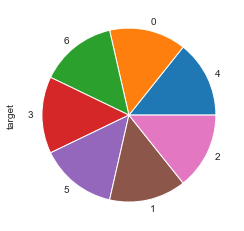

In [16]:
data_text.target.value_counts().plot(kind="pie")

##### Length

In [17]:
data_text.text.apply(lambda i: len(i))

0       1420
1        444
2       1258
3        858
4       1197
        ... 
1045    2432
1046    1660
1047     262
1048     210
1049     187
Name: text, Length: 1050, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text'>

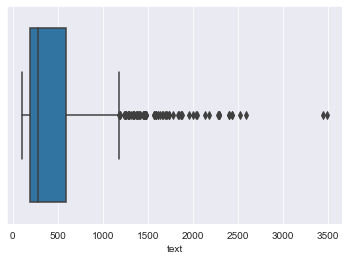

In [18]:
tmp = data_text.text.str.len()
data_text["_len_txt_"] = tmp

sns.boxplot(tmp)

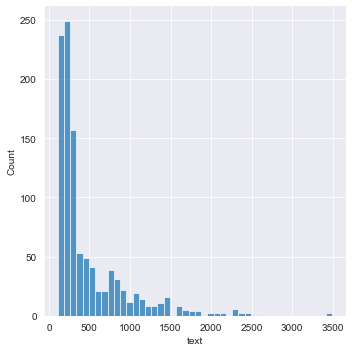

In [19]:
sns.displot(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='product_name'>

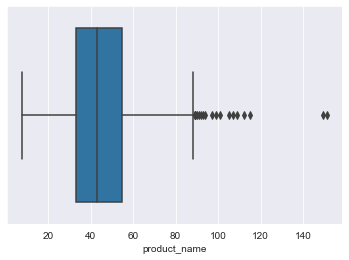

In [20]:
tmp = data_text.product_name.str.len()
data_text["_len_product_name_"] = tmp

sns.boxplot(tmp)

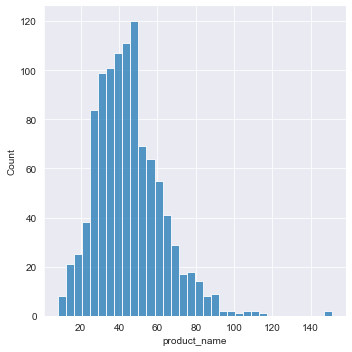

In [21]:
sns.displot(tmp)

In [22]:
data_text

,product_name,text,category,target,_len_txt_,_len_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,1420,58
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,444,26
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,1258,35
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,858,63
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,1197,53
...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,1660,38
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,262,65
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,210,39


##### Multivariate analysis

In [23]:
corr = data_text.corr()
corr

C:\Users\oumei\AppData\Local\Temp/ipykernel_17424/3719709273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_text.corr()


,target,_len_txt_,_len_product_name_
target,1.000000,-0.020285,-0.011436
_len_txt_,-0.020285,1.000000,0.174393
_len_product_name_,-0.011436,0.174393,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)


<AxesSubplot:>

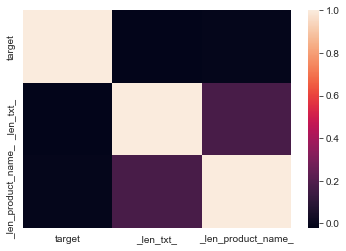

In [24]:
sns.heatmap(corr)

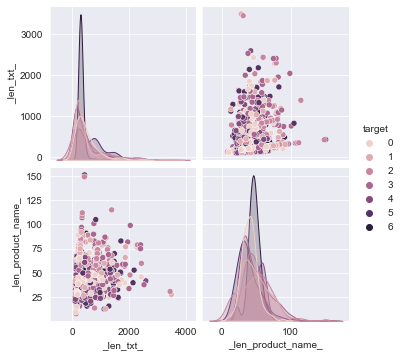

In [25]:
sns.pairplot(data_text, hue="target")

In [26]:
data_text.sort_values("_len_txt_").head(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
877,Nkp Cotton Bath Towel,Buy Nkp Cotton Bath Towel at Rs. 549 at Flipka...,Home Furnishing,4,109,21
890,IWS Cotton Bath Towel,Buy IWS Cotton Bath Towel at Rs. 299 at Flipka...,Home Furnishing,4,109,21
1030,OMRD RD6697 Hot and cold Pack,Specifications of OMRD RD6697 Hot and cold Pac...,Beauty and Personal Care,1,111,29
651,Marvel Cotton Bath Towel,Buy Marvel Cotton Bath Towel at Rs. 449 at Fli...,Baby Care,0,112,24
892,MB Cotton Set of Towels,Buy MB Cotton Set of Towels at Rs. 1195 at Fli...,Home Furnishing,4,112,23
599,Next Steps Baby Girl's Layered Dress,Next Steps Baby Girl's Layered Dress\r\n ...,Baby Care,0,112,36
1005,Milani Runway shadow Wet/Dry Black Out 3 g,Specifications of Milani Runway shadow Wet/Dry...,Beauty and Personal Care,1,113,42
678,Neyth Cotton Set of Towels,Buy Neyth Cotton Set of Towels at Rs. 170 at F...,Baby Care,0,114,26
874,Mafatlal Cotton Bath Towel,Buy Mafatlal Cotton Bath Towel at Rs. 545 at F...,Home Furnishing,4,114,26
884,Amber Cotton Set of Towels,Buy Amber Cotton Set of Towels at Rs. 239 at F...,Home Furnishing,4,114,26


In [27]:
data_text.sort_values("_len_txt_").tail(10)

,product_name,text,category,target,_len_txt_,_len_product_name_
433,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2297,79
435,"Smartpro 19.5v,3.9a Replacement Charger for Va...","Key Features of Smartpro 19.5v,3.9a Replacemen...",Computers,2,2298,79
696,Tallenge Christmas Collection - Nativity Art -...,Tallenge Christmas Collection - Nativity Art -...,Home Decor & Festive Needs,3,2405,75
694,Tallenge Christmas Collection - Echoes Of Wint...,Tallenge Christmas Collection - Echoes Of Wint...,Home Decor & Festive Needs,3,2409,79
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,2432,46
589,"Shopfloor.XYZ Vacuum Cleaner for Computers, La...","Shopfloor.XYZ Vacuum Cleaner for Computers, La...",Computers,2,2436,60
916,wallskart Floral & Botanical Wallpaper,Key Features of wallskart Floral & Botanical W...,Home Decor & Festive Needs,3,2529,38
715,Pioneer Pragati Floral Single Duvet Orange,Pioneer Pragati Floral Single Duvet Orange (1 ...,Home Furnishing,4,2594,42
639,Sunlast 16 inch Laptop Backpack,Key Features of Sunlast 16 inch Laptop Backpac...,Computers,2,3447,31
437,HomeEdge Solid Wood King Bed,Key Features of HomeEdge Solid Wood King Bed K...,Beauty and Personal Care,1,3490,28


In [28]:
data_text = data_text.drop(columns=["_len_txt_", "_len_product_name_"])
data_text

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4
...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0


#### Explore corpus and documents

##### 1) print N random documents

In [29]:
df_sample = data_text.sample(20)
df_sample

,product_name,text,category,target
1012,Ech oly Ceramic Inside Fitting Hookah Mouth Tip,Ech oly Ceramic Inside Fitting Hookah Mouth Ti...,Home Decor & Festive Needs,3
882,Mandhania Cotton Bath Towel,Buy Mandhania Cotton Bath Towel at Rs. 280 at ...,Home Furnishing,4
330,Asus RT-N12 LX 300Mbps Wireless Router,Buy Asus RT-N12 LX 300Mbps Wireless Router onl...,Computers,2
523,Maxima 09321CMGY Gold Analog Watch - For Men,Maxima 09321CMGY Gold Analog Watch - For Men ...,Watches,6
727,Gift Studios Ganesha Stone Showpiece - 17.6 cm,Buy Gift Studios Ganesha Stone Showpiece - 1...,Home Decor & Festive Needs,3
390,TP-LINK 4-Port Cable/DSL/TL-R460,Buy TP-LINK 4-Port Cable/DSL/TL-R460 only for ...,Computers,2
157,Prithish Better Than Having You For A Husband ...,Prithish Better Than Having You For A Husband ...,Kitchen & Dining,5
177,Printland PMR1834 Ceramic Mug,Printland PMR1834 Ceramic Mug (350 ml)\r\n ...,Kitchen & Dining,5
563,Fluid FS201-BL01 Analog-Digital Watch - For W...,Fluid FS201-BL01 Analog-Digital Watch - For W...,Watches,6
339,Edimax AR-7286WNA,Buy Edimax AR-7286WNA only for Rs. 2445 from F...,Computers,2


In [30]:
for index, series in df_sample.iterrows():
    text_1 = f"target: {series['target']}\n"
    print(text_1 + series["text"] + "..." + "\n\n")

target: 3
Ech oly Ceramic Inside Fitting Hookah Mouth Tip (Black) Price: Rs. 699 Durable and can be used repeatedly for a long time. Made of high-quality special material. Does Not Contain harmful objects. The rubber ring can prevent smoke and tar from leaking. Remove tar while using for about 20 times. Replace with an auxiliary rubber ring if damages.,Specifications of Ech oly Ceramic Inside Fitting Hookah Mouth Tip (Black) General Brand Ech oly Model Number Durable Tobacco pipe B117 Type Inside Fitting Material Ceramic Pack of 1 Color Black In the Box Pack of 1...


target: 4
Buy Mandhania Cotton Bath Towel at Rs. 280 at Flipkart.com. Only Genuine Products. Free Shipping. Cash On Delivery!...


target: 2
Buy Asus RT-N12 LX 300Mbps Wireless Router only for Rs. 4200 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


target: 6
Maxima 09321CMGY Gold Analog Watch  - For Men - Buy Maxima 09321CMGY Gold Analog Watch  - For Men  0932

##### 2) print documents vs target

In [31]:
def print_sample(sub_df, n_sample=10):
    """
    Prints out n_sample documents from a corpus
    :param sub_df:
    :param n_sample:
    :return:
    """
    sample = sub_df.sample(n_sample)

    for index, series in sample.iterrows():
        text_1 = f"target: {series['target']}\n"
        print(text_1 + series["text"] + "..." + "\n\n")

In [32]:
df_1 = data_text[data_text.target == 1]
df_1.head()

,product_name,text,category,target
43,Burt s Bees Hair Repair Shea And Grapefruit De...,Key Features of Burt s Bees Hair Repair Shea A...,Beauty and Personal Care,1
49,Suave Naturals Everlasting Sunshine Conditioner,Key Features of Suave Naturals Everlasting Sun...,Beauty and Personal Care,1
56,Borse N16 Make Up And Jewellery Vanity Case,Buy Borse N16 Make Up And Jewellery Vanity Cas...,Beauty and Personal Care,1
57,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Specifications of RYTHMX FB NAIL POLISHES BLAC...,Beauty and Personal Care,1
58,RYTHMX FB NAIL POLISHES BLACK LIPSTICKS IMPORT...,Key Features of RYTHMX FB NAIL POLISHES BLACK ...,Beauty and Personal Care,1


In [33]:
print_sample(df_1)

target: 1
Flipkart.com: Buy Nike Orange Combo Set online only for Rs. 370 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!...


target: 1
Giorgio Armani SMOOTH SILK LIP PENCIL 12 (Soyeux 12) Price: Rs. 1,710 Glides on smoothly and defines the look of your lips with gorgeous colour.,Specifications of Giorgio Armani SMOOTH SILK LIP PENCIL 12 (Soyeux 12) Lip Liner Details Dual-tipped No Shade Soyeux 12 Waterproof No Smudge-free No Size 1.14 In the Box 1 Lip Pencil...


target: 1
Key Features of AntiqueShop ABKL_PL_PNK_PNK Soft on the skin Rope loop for easy hanging Durable, long lasting material Great for liquid soaps and body wash With this soft sponge, you can have a comforting and relaxing warm shower,AntiqueShop ABKL_PL_PNK_PNK Price: Rs. 349 Brand New Nylon Body Shower Bath Puff Sponge Loofah Wash, Reaching Where No Other Scrubber Reaches. This product is made out of soft mesh, crafted perfectly thinking in exfoliating gently yo

In [34]:
df_6 = data_text[data_text.target == 6]
print_sample(df_6)

target: 6
Maxima 19883BMLI Swarovski Analog Watch  - For Women - Buy Maxima 19883BMLI Swarovski Analog Watch  - For Women  19883BMLI Online at Rs.995 in India Only at Flipkart.com. Silver Strap, Water Resistant, Contemporary Dial - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Timewel N1536(GW)_1 Analog Watch  - For Men - Buy Timewel N1536(GW)_1 Analog Watch  - For Men  N1536(GW)_1 Online at Rs.855 in India Only at Flipkart.com. - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Sonata 8974PP01 Analog Watch  - For Women - Buy Sonata 8974PP01 Analog Watch  - For Women  8974PP01 Online at Rs.550 in India Only at Flipkart.com. Contemporary Dial, White Strap, Water Resistant - Great Discounts, Only Genuine Products, 30 Day Replacement Guarantee, Free Shipping. Cash On Delivery!...


target: 6
Disney DW100405 Digital Watch  - For Boys - Buy Disney DW10

## Part II : Text processing

##### Downloads and options

In [35]:
# download

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\oumei\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [36]:
# pandarallel
pandarallel.initialize(progress_bar=True, nb_workers=6
                       #, verbose=1
                       )

INFO: Pandarallel will run on 6 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [37]:
# init sns
sns.set()

##### Loading data

In [38]:
data_text.head()

,product_name,text,category,target
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4


In [39]:
data_text.shape

(1050, 4)

### I) Cleaning the corpus

#### Work on a specific document

In [40]:
# select a random document

doc = data_text.text.sample(1)  # get a row
doc = doc.values[0]  # get a numpy array
doc

'Flipkart.com: Buy Denim Deo Combo Set online only for Rs. 250 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!'

##### 1) Lower

In [41]:
doc = doc.lower()
doc

'flipkart.com: buy denim deo combo set online only for rs. 250 from flipkart.com. only genuine products. 30 day replacement guarantee. free shipping. cash on delivery!'

##### 2) Tokenization

In [42]:
tokens = word_tokenize(doc)
tokens

['flipkart.com',
 ':',
 'buy',
 'denim',
 'deo',
 'combo',
 'set',
 'online',
 'only',
 'for',
 'rs',
 '.',
 '250',
 'from',
 'flipkart.com',
 '.',
 'only',
 'genuine',
 'products',
 '.',
 '30',
 'day',
 'replacement',
 'guarantee',
 '.',
 'free',
 'shipping',
 '.',
 'cash',
 'on',
 'delivery',
 '!']

In [43]:
len(tokens)

32

In [44]:
len(set(tokens))

26

In [45]:
display_tokens_info(tokens)

nb tokens 32, nb tokens uniques 26
['flipkart.com', ':', 'buy', 'denim', 'deo', 'combo', 'set', 'online', 'only', 'for', 'rs', '.', '250', 'from', 'flipkart.com', '.', 'only', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.', 'free', 'shipping', '.', 'cash', 'on']
['deo', 'only', 'denim', 'flipkart.com', 'genuine', 'online', 'replacement', 'set', '30', 'for', 'combo', '250', ':', 'guarantee', 'buy', 'shipping', '.', 'day', 'cash', 'free', 'from', 'products', 'on', 'rs']


In [46]:
# an other tokenize

tokens = wordpunct_tokenize(doc)
display_tokens_info(tokens)

nb tokens 36, nb tokens uniques 27
['flipkart', '.', 'com', ':', 'buy', 'denim', 'deo', 'combo', 'set', 'online', 'only', 'for', 'rs', '.', '250', 'from', 'flipkart', '.', 'com', '.', 'only', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.', 'free']
['deo', 'only', 'denim', 'genuine', 'online', 'replacement', 'set', '30', 'for', 'flipkart', 'combo', '250', ':', 'guarantee', 'buy', 'com', '.', 'day', 'free', 'from', 'products', 'rs']


##### 3) Stopwords

In [47]:
# stop_words

#global stop_words
#stop_words = set(stopwords.words('english'))
print(stop_words)

{'during', "you're", 'hers', 'out', 'wouldn', "wouldn't", 'having', 'he', 'because', 'few', 'y', 'don', 'with', 'after', 'while', 'between', 'other', 'no', 'who', 'when', 'if', 'ours', 'such', "shan't", 'o', 'yourself', "it's", 'so', 'have', 'couldn', 'will', 'to', 'shouldn', 'each', 'can', 'from', 'any', 'all', "needn't", 'theirs', "that'll", 'against', 'whom', 'over', 'didn', 'too', 'me', "should've", 're', 'which', 'wasn', 'his', 'then', "couldn't", 'what', 'yours', 'further', 'off', 'not', "aren't", 'you', 'same', 'should', "doesn't", "you'd", 'for', 'weren', "shouldn't", 'did', 'won', 'those', 'haven', 'ain', 'yourselves', 'had', 'just', 'into', 'how', 'them', 'needn', 'does', 't', 'in', 'on', 'been', 'their', "didn't", 'very', 'and', 'am', 'her', 'shan', 'are', 'here', 'nor', 'has', 'it', 'they', 'or', 'own', 've', 'at', "mightn't", 'being', 'd', 'about', 'my', 'hadn', 'up', "isn't", 'our', 'down', 'than', "don't", 'that', 'himself', 'an', 'more', 'ourselves', 'do', "haven't", 't

In [48]:
tokens = [w for w in tokens if w not in stop_words]

In [49]:
display_tokens_info(tokens)

nb tokens 31, nb tokens uniques 23
['flipkart', '.', 'com', ':', 'buy', 'denim', 'deo', 'combo', 'set', 'online', 'rs', '.', '250', 'flipkart', '.', 'com', '.', 'genuine', 'products', '.', '30', 'day', 'replacement', 'guarantee', '.', 'free', 'shipping', '.', 'cash', 'delivery']
['deo', 'denim', 'genuine', 'online', 'replacement', 'set', '30', 'flipkart', 'delivery', 'combo', '250', ':', 'guarantee', 'buy', 'com', 'shipping', '.', 'day', 'cash', 'free', 'products', 'rs']


In [50]:
# an other tokenizer

tokenizer = RegexpTokenizer(r"\w+")
tokens = tokenizer.tokenize(doc)
display_tokens_info(tokens)

nb tokens 27, nb tokens uniques 24
['flipkart', 'com', 'buy', 'denim', 'deo', 'combo', 'set', 'online', 'only', 'for', 'rs', '250', 'from', 'flipkart', 'com', 'only', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'on', 'delivery']
['deo', 'only', 'denim', 'genuine', 'online', 'replacement', 'set', '30', 'for', 'flipkart', 'delivery', 'combo', '250', 'guarantee', 'buy', 'com', 'shipping', 'day', 'cash', 'free', 'from', 'products', 'on', 'rs']


In [51]:
# remove stopwords

tokens = [w for w in tokens if w not in stop_words]
display_tokens_info(tokens)

nb tokens 22, nb tokens uniques 20
['flipkart', 'com', 'buy', 'denim', 'deo', 'combo', 'set', 'online', 'rs', '250', 'flipkart', 'com', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery']
['deo', 'denim', 'genuine', 'online', 'replacement', 'set', '30', 'flipkart', 'delivery', 'combo', '250', 'guarantee', 'buy', 'com', 'shipping', 'day', 'cash', 'free', 'products', 'rs']


##### 4) First cleaning function

In [52]:
tokens = process_text_1(doc)
display_tokens_info(tokens)

nb tokens 22, nb tokens uniques 20
['flipkart', 'com', 'buy', 'denim', 'deo', 'combo', 'set', 'online', 'rs', '250', 'flipkart', 'com', 'genuine', 'products', '30', 'day', 'replacement', 'guarantee', 'free', 'shipping', 'cash', 'delivery']
['deo', 'denim', 'genuine', 'online', 'replacement', 'set', '30', 'flipkart', 'delivery', 'combo', '250', 'guarantee', 'buy', 'com', 'shipping', 'day', 'cash', 'free', 'products', 'rs']


#### Working on the entire corpus

##### 1) Build raw corpus

In [53]:
# join all corpus

raw_corpus = "".join(data_text.text.values)
raw_corpus[:1_000]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [54]:
len(raw_corpus)

497512

In [55]:
# process the corpus

corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['look', 'multicolor', 'abstract', 'height', 'enhances', 'elegance', '213', 'curtain', 'door', 'cm', 'polyester', 'pack', 'interiors', 'price', 'floral', 'eyelet', 'features', 'key', '899', '2', 'rs']


In [56]:
# value counts

tmp = pd.Series(corpus).value_counts()
tmp

rs           911
products     631
free         618
delivery     567
cash         564
            ... 
drawerkey      1
680            1
roundbuy       1
homeehub       1
dell           1
Length: 6165, dtype: int64

In [57]:
# visualization

#sns.barplot(x=tmp.index, y=tmp.values)

In [58]:
# 30th most common tokens

tmp.head(30)

rs                911
products          631
free              618
delivery          567
cash              564
genuine           564
shipping          564
replacement       559
buy               543
day               540
cm                532
1                 524
30                498
flipkart          475
guarantee         471
com               468
online            396
features          395
price             352
watch             329
color             328
baby              320
mug               318
pack              317
material          312
set               306
type              304
cotton            299
specifications    295
box               291
dtype: int64

In [59]:
# 30th last common tokens

tmp.tail(30)

md199hn                 1
seaterspecifications    1
explode                 1
shot                    1
huawei                  1
sport                   1
ski                     1
1399                    1
ac2400                  1
bornbabykids            1
552                     1
4509                    1
ws331c                  1
architecture            1
5199                    1
socket                  1
1150key                 1
6428nc                  1
585                     1
clothing                1
needybee                1
752dru                  1
susceptible             1
linespecifications      1
esteem                  1
drawerkey               1
680                     1
roundbuy                1
homeehub                1
dell                    1
dtype: int64

In [60]:
tmp.describe()

count    6165.000000
mean        9.967883
std        38.897271
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       911.000000
dtype: float64

In [61]:
# sns.displot(tmp)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

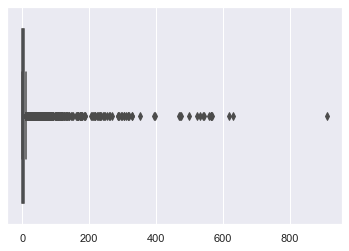

In [62]:
sns.boxplot(tmp)  # 'bad distribution'

##### 2) List rare tokens

In [63]:
# unique words --> not useful

tmp = pd.Series(corpus).value_counts()
list_unique_words = tmp[tmp == 1]
list_unique_words[:30]

paraben         1
vinegar         1
glycol          1
oodles          1
ingredients     1
skip            1
bullshit        1
word            1
soapking        1
hop             1
arabicoudh      1
grass           1
students        1
979             1
leafs           1
vegetarian      1
length225       1
6645            1
quantities      1
sscp            1
582             1
appreciation    1
flawers         1
tulip           1
playing         1
balls           1
ballsech        1
repeatedly      1
pmr1918         1
pmba1872        1
dtype: int64

In [64]:
len(list_unique_words)

2114

In [65]:
list_unique_words = list(list_unique_words.index)
list_unique_words[:30]

['paraben',
 'vinegar',
 'glycol',
 'oodles',
 'ingredients',
 'skip',
 'bullshit',
 'word',
 'soapking',
 'hop',
 'arabicoudh',
 'grass',
 'students',
 '979',
 'leafs',
 'vegetarian',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'tulip',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872']

In [66]:
# save it for later

tmp = pd.DataFrame({"words": list_unique_words})
tmp.to_csv(output_path + "unique_words.csv", index=False)

In [67]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_2_words = tmp[tmp <= 2]
list_max_2_words[:30]

pokizo                2
knows                 2
deluxe                2
prestige              2
birds                 2
thus                  2
styles                2
880                   2
dean                  2
stage                 2
plus                  2
neckspecifications    2
welcomed              2
milton                2
camerii               2
zipper                2
hourglass             2
pressure              2
bib                   2
850                   2
dat                   2
neckerchew            2
chompers              2
v220w                 2
fashionin             2
velcro                2
cheeky                2
bsf                   2
hilton                2
superb                2
dtype: int64

In [68]:
len(list_max_2_words)

3446

In [69]:
# save it

list_max_2_words = list(list_max_2_words.index)
tmp = pd.DataFrame({"words": list_max_2_words})
tmp.to_csv(output_path + "max_2_words.csv", index=False)

In [70]:
# idem for 5 times

tmp = pd.Series(corpus).value_counts()
list_max_5_words = tmp[tmp <= 5]
list_max_5_words[:30]

opener       5
dummy        5
marvel       5
ordinary     5
following    5
watche       5
belt         5
layers       5
trendnet     5
burner       5
fb           5
beach        5
moist        5
995          5
attention    5
vatika       5
strip        5
intel        5
across       5
colored      5
styling      5
appealing    5
polishes     5
serving      5
winter       5
lace         5
loves        5
320          5
fluffy       5
straps       5
dtype: int64

In [71]:
len(list_max_5_words)

4677

In [72]:
# save it

list_max_5_words = list(list_max_5_words.index)
tmp = pd.DataFrame({"words": list_max_5_words})
tmp.to_csv(output_path + "max_5_words.csv", index=False)

##### 3) 2nd cleaning function

In [73]:
display_tokens_info(corpus)

nb tokens 61452, nb tokens uniques 6165
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', '213', 'cm', 'height', 'pack', '2', 'price', 'rs', '899', 'curtain', 'enhances', 'look', 'interiors']
['look', 'multicolor', 'abstract', 'height', 'enhances', 'elegance', '213', 'curtain', 'door', 'cm', 'polyester', 'pack', 'interiors', 'price', 'floral', 'eyelet', 'features', 'key', '899', '2', 'rs']


In [74]:
len(set(corpus))

6165

In [75]:
corpus = process_text_2(raw_corpus,
                        list_rare_words=list_unique_words,
                        rejoin=False)
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 3396
['key', 'features', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interiors', 'curtain', 'made', 'high', 'quality', 'polyester']
['look', 'multicolor', 'abstract', 'quality', 'height', 'made', 'elegance', 'enhances', 'curtain', 'door', 'polyester', 'pack', 'interiors', 'price', 'floral', 'eyelet', 'features', 'key', 'high']


In [76]:
len(set(corpus))

3396

##### 4) Stemming and Lemmatization

Lemmatization is the process of grouping together the different inflected forms of a word, so they can be analyzed as a single item. Lemmatization is similar to stemming, but it brings context to the words. So it links words with similar meanings to one word.

Stemming is the process if producing morphological variants of a root/base word. Stemming programs are commonly referred to as stemming algorithms or stemmers.

In [77]:
# +/- 3s
corpus = process_text_3(raw_corpus, rejoin=False, list_rare_words=list_unique_words)
pd.Series(corpus).sample(30)

34675       hindu
17401     product
39538     portabl
34544      beauti
25400    deliveri
30335      tradit
17663       spray
32313    jacquard
46051        base
29722        size
39447         usb
5438     interact
613           day
19057        hair
5262         made
33006       price
8400        ceram
30710         boy
17610      genuin
44259       addit
36332       cream
33091         com
4201       length
44473        home
6285         fill
23545        bodi
7485       design
19850      featur
37196        blue
31825        line
dtype: object

In [78]:
display_tokens_info(corpus)

nb tokens 51097, nb tokens uniques 2773
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['enhanc', 'look', 'eleg', 'multicolor', 'abstract', 'made', 'height', 'curtain', 'door', 'pack', 'price', 'floral', 'eyelet', 'polyest', 'key', 'qualiti', 'featur', 'interior', 'high']


In [79]:
corpus_lem = process_text_3(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words)
pd.Series(corpus_lem).sample(30)

441           cotton
29047           also
47936        general
36423    immediately
23935            may
47199         pretty
31636           dual
19420        product
33220          print
45565           soft
39006        genuine
17200            day
49532        curtain
8563      dishwasher
44835         maroon
2062           price
42807         cotton
34737          first
11263            mug
33677        artwork
48645        general
2724        capacity
5013         outside
24606         plated
47535           sofa
50278         design
19223            box
29996          price
38886         online
18448         online
dtype: object

In [80]:
display_tokens_info(corpus_lem)

nb tokens 51097, nb tokens uniques 3123
['key', 'feature', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhances', 'look', 'interior', 'curtain', 'made', 'high', 'quality', 'polyester']
['look', 'feature', 'multicolor', 'abstract', 'quality', 'height', 'made', 'elegance', 'enhances', 'curtain', 'door', 'polyester', 'pack', 'price', 'floral', 'eyelet', 'key', 'interior', 'high']


##### 5) Only english words

In [81]:
pd.Series(words.words()).sample(30)

215046          undilatable
224470           unturnable
120731         multitudinal
25344                boxman
201521    theologicoethical
169055           rewardably
158828       pseudomorphine
61944           endoneurium
5053            Aleurodidae
194601      superindividual
186335            sphacelus
196892           synodontid
70348           fissiparous
115160        methodization
228210     verticilliaceous
108901               lumper
231124          weatherward
65486         eumerogenesis
49283              decanter
225506            upsetting
17010                 azole
229426             vivipary
30026           cappelenite
231986          whisterpoop
11749         appellability
16191               autoist
24473             bombproof
95487                instep
22997         bitentaculate
30870         carpetbaggism
dtype: object

In [82]:
len(set(words.words()))

235892

In [83]:
eng_words = [i.lower() for i in words.words()]
eng_words[:30]

['a',
 'a',
 'aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardvark',
 'aardwolf',
 'aaron',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'aback',
 'abactinal',
 'abactinally']

In [84]:
len(set(eng_words))

234377

In [85]:
ps = PorterStemmer()
eng_words_stem = [ps.stem(i) for i in eng_words]
display_tokens_info(eng_words_stem)

nb tokens 236736, nb tokens uniques 178311
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaron', 'aaron', 'aaronit', 'aaronit', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abac', 'abacay', 'abacin', 'abacin', 'abaciscu', 'abacist', 'aback', 'abactin', 'abactin']
['aback', 'a', 'ababua', 'aani', 'ababdeh', 'aaron', 'aaru', 'aba', 'abacay', 'abacist', 'abac', 'abacin', 'aam', 'ab', 'abaciscu', 'aaronit', 'aa', 'aalii', 'aardvark', 'abactin', 'aal', 'aardwolf', 'abaca']


In [86]:
len(set(eng_words_stem))

178311

In [87]:
lm = WordNetLemmatizer()
eng_words_lem = [lm.lemmatize(i) for i in eng_words]
display_tokens_info(eng_words_lem)

nb tokens 236736, nb tokens uniques 233450
['a', 'a', 'aa', 'aal', 'aalii', 'aam', 'aani', 'aardvark', 'aardwolf', 'aaron', 'aaronic', 'aaronical', 'aaronite', 'aaronitic', 'aaru', 'ab', 'aba', 'ababdeh', 'ababua', 'abac', 'abaca', 'abacate', 'abacay', 'abacinate', 'abacination', 'abaciscus', 'abacist', 'aback', 'abactinal', 'abactinally']
['aback', 'a', 'abactinally', 'ababua', 'abactinal', 'abacate', 'aani', 'aaronical', 'abacinate', 'ababdeh', 'aaron', 'aaru', 'aba', 'abacay', 'abaciscus', 'abacist', 'abac', 'aaronic', 'aaronite', 'aam', 'ab', 'aaronitic', 'aa', 'aalii', 'aardvark', 'abacination', 'aal', 'aardwolf', 'abaca']


In [88]:
len(set(eng_words_lem))

233450

In [89]:
corpus = process_text_4(raw_corpus, rejoin=False, lem_or_stem="stem", list_rare_words=list_unique_words,
                        eng_words=eng_words_stem)

display_tokens_info(corpus)

nb tokens 45937, nb tokens uniques 2166
['key', 'featur', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'floral', 'curtain', 'eleg', 'polyest', 'multicolor', 'abstract', 'eyelet', 'door', 'curtain', 'height', 'pack', 'price', 'curtain', 'enhanc', 'look', 'interior', 'curtain', 'made', 'high', 'qualiti', 'polyest']
['enhanc', 'look', 'eleg', 'multicolor', 'abstract', 'made', 'height', 'curtain', 'door', 'pack', 'price', 'floral', 'eyelet', 'polyest', 'key', 'qualiti', 'featur', 'interior', 'high']


In [90]:
len(set(corpus))

2166

In [91]:
corpus_lem = process_text_4(raw_corpus, rejoin=False, lem_or_stem="lem", list_rare_words=list_unique_words,
                            eng_words=eng_words_lem)
pd.Series(corpus_lem).sample(30)

11088        showpiece
29532            month
30640    specification
17265             cord
43827          install
4515              inch
36904            white
43844            brand
13061             cash
42451              box
43390             pack
9850             water
100               pack
44212           medium
19247       sleeveless
22620             dial
11523           romper
1325          enlarged
1923             glass
38772             room
40095            model
24346          refresh
9603             fresh
27639           fabric
22288              day
22547          maximum
35437            quilt
19794          applied
9609           feature
9324              stay
dtype: object

In [92]:
len(set(corpus_lem))

2333

In [93]:
corpus

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attent',
 'sure',
 'contemporari',
 'eyelet',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'even',
 'creat',
 'special',
 'moment',
 'beauti',
 'given',
 'sooth',
 'print',
 'bring',
 'home',
 'eleg',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',
 'specif',
 'eleg',
 'polyest',
 

In [94]:
corpus_lem

['key',
 'feature',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'elegance',
 'polyester',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'curtain',
 'look',
 'interior',
 'curtain',
 'made',
 'high',
 'quality',
 'polyester',
 'fabric',
 'feature',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environment',
 'curtain',
 'ant',
 'wrinkle',
 'anti',
 'shrinkage',
 'elegant',
 'give',
 'home',
 'bright',
 'appeal',
 'design',
 'attention',
 'sure',
 'contemporary',
 'eyelet',
 'curtain',
 'slide',
 'smoothly',
 'draw',
 'apart',
 'first',
 'thing',
 'morning',
 'welcome',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morning',
 'whole',
 'world',
 'draw',
 'evening',
 'create',
 'special',
 'moment',
 'beauty',
 'given',
 'soothing',
 'print',
 'bring',
 'home',
 'elegant',
 'curtain',
 'light',
 'room',
 'get',
 'right',
 'amount',
 'sunlight',

In [95]:
tmp = pd.Series(corpus_lem).value_counts()
tmp

product        863
free           618
delivery       567
cash           564
shipping       564
              ... 
captivating      2
nexus            2
teal             2
extended         2
film             2
Length: 2333, dtype: int64

In [96]:
##sns.barplot(x=tmp.index, y=tmp.values)

##### 6) Wordcloud

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

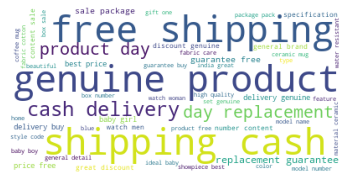

In [97]:
display_wordcloud([corpus_lem])

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wo

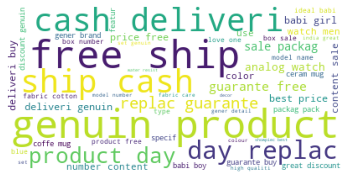

In [98]:
display_wordcloud([corpus])

#### Divide the corpus

##### 1) Separate the 7 categories

In [99]:
for i in range(7):
    globals()["df_" + str(i)] = data_text[data_text.target == i]

In [100]:
df_0.head()

,product_name,text,category,target
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0


In [101]:
df_6.head()

,product_name,text,category,target
5,Maserati Time R8851116001 Analog Watch - For ...,Maserati Time R8851116001 Analog Watch - For ...,Watches,6
6,"Camerii WM64 Elegance Analog Watch - For Men,...","Camerii WM64 Elegance Analog Watch - For Men,...",Watches,6
7,T STAR UFT-TSW-005-BK-BR Analog Watch - For Boys,T STAR UFT-TSW-005-BK-BR Analog Watch - For B...,Watches,6
8,"Alfajr WY16B Youth Digital Watch - For Men, Boys","Alfajr WY16B Youth Digital Watch - For Men, B...",Watches,6
9,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...,Watches,6


In [102]:
for i in range(7):
    globals()["corpus_" + str(i)] = " ".join(globals()["df_" + str(i)].text)

In [103]:
corpus_0[:1000]

'Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Features Machine Washable Yes Material Cotton Design Self Design General Brand Sathiyas Type Bath Towel GSM 500 Model Name Sathiyas cotton bath towel Ideal For Men, Women, Boys, Girls Model ID asvtwl322 Color Red, Yellow, Blue Size Mediam Dimensions Length 30 inch Width 60 inch In the Box Number of Contents in Sales Package 3 Sales Package 3 Bath Towel Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa Cotton Terry Face Towel Set (20 PIECE FACE TOWEL SET, Assorted) Price: Rs. 299 Eurospa brings to you an exclusively designed, 100% soft cotton towels of export quality. All our products have soft texture that takes care of your skin and gives you that enriched feeling you deserve. Eurospa has been exporting its bath towels to lot of renowned brands for last 10 years and is famous for its fine prints, absorbency, softness and durability. NOTE: Our product

In [104]:
len(corpus_0)

72541

In [105]:
len(corpus_6)

49083

##### 2) Process all of them

In [106]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__Before__Category__0
nb tokens 72541, nb tokens uniques 93
Specifications of Sathiyas Cot
['p', 'h', 'o', 'c', 'n', 'a', 'C', ' ', 'S', 'y', 't', 'f', 's', 'i', 'e']


__Before__Category__1
nb tokens 56618, nb tokens uniques 83
Key Features of Burt s Bees Ha
['o', 'a', ' ', 'K', 'F', 'u', 'r', 'B', 't', 'H', 's', 'f', 'y', 'e']


__Before__Category__2
nb tokens 83329, nb tokens uniques 87
Key Features of D-Link DAP1320
['P', 'L', 'a', 'u', 'F', 'i', 'y', 'D', '1', 'r', '-', 'A', 'e', '3', 'o', 'k', 'K', 'n', ' ', '0', 't', 's', 'f', '2']


__Before__Category__3
nb tokens 84704, nb tokens uniques 92
Myesquire Ceramic Burner Pot L
['P', 'L', 'a', 'u', 'B', 'i', 'y', 'r', 'e', 'm', 'o', 'n', 'c', 'M', 'C', ' ', 't', 'q', 's']


__Before__Category__4
nb tokens 57118, nb tokens uniques 84
Key Features of Elegance Polye
['P', 'o', 'n', 'c', 'a', ' ', 'K', 'F', 'u', 'r', 'g', 't', 's', 'f', 'l', 'E', 'y', 'e']


__Before__Category__5
nb tokens 95162, nb tokens uniques 85
Key Features of Du

In [107]:
for i in range(7):
    globals()["corpus_" + str(i)] = process_text_4(globals()["corpus_" + str(i)],
                                                   rejoin=False,
                                                   list_rare_words=list_unique_words,
                                                   eng_words=eng_words_stem)

In [108]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_" + str(i)])



__After__Category__0
nb tokens 7813, nb tokens uniques 790
['specif', 'cotton', 'bath', 'towel', 'bath', 'towel', 'red', 'yellow', 'blue', 'bath', 'towel', 'featur', 'machin', 'washabl', 'ye', 'materi', 'cotton', 'design', 'self', 'design', 'gener', 'brand', 'type', 'bath', 'towel', 'model', 'name', 'cotton', 'bath', 'towel']
['gener', 'machin', 'specif', 'self', 'bath', 'yellow', 'type', 'brand', 'ye', 'towel', 'model', 'materi', 'red', 'name', 'cotton', 'washabl', 'featur', 'blue', 'design']


__After__Category__1
nb tokens 5050, nb tokens uniques 769
['key', 'featur', 'burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'ideal', 'boy', 'girl', 'appli', 'deep', 'condit', 'hair', 'condit', 'damag', 'hair', 'hair', 'type', 'dri', 'hair', 'specif', 'burt', 'bee', 'hair', 'repair', 'shea']
['grapefruit', 'appli', 'deep', 'specif', 'condition', 'type', 'hair', 'boy', 'bee', 'burt', 'key', 'dri', 'ideal', 'damag', 'girl', 'shea', 'featur', 'condit', 'repair']


__A

In [109]:
corpus_list = [globals()["corpus_" + str(i)] for i in range(7)]

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

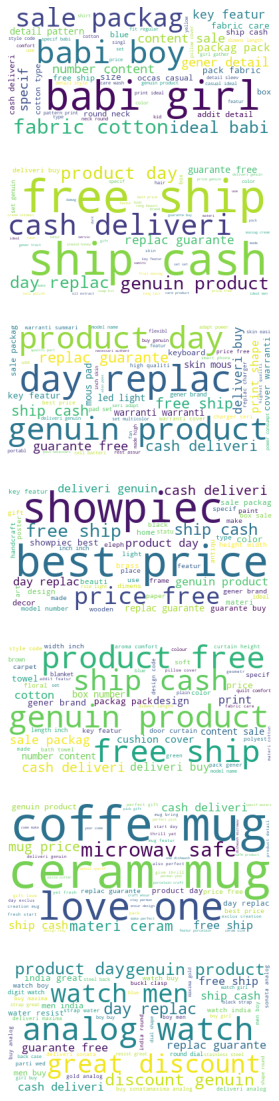

In [110]:
display_wordcloud(corpus_list)

In [111]:
pd.Series(corpus_0).value_counts().head(20)

babi      316
girl      197
cotton    191
detail    180
fabric    164
boy       112
print     105
dress     105
specif    100
ideal      98
gener      96
featur     88
packag     88
sleev      86
type       85
sale       85
color      83
wash       80
neck       80
number     76
dtype: int64

In [112]:
pd.Series(corpus_6).value_counts().head(20)

watch       354
analog      256
men         158
product     136
day         136
deliveri    134
replac      134
cash        134
ship        134
free        134
guarante    134
genuin      134
discount    134
great       134
india       134
buy         134
dial         90
strap        79
boy          67
resist       55
dtype: int64

##### Duplicated words in all of the 7 categories

In [113]:
n = 10
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

[]

In [114]:
n = 20
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['type', 'color']

In [115]:
n = 30
doublons = [i for i in pd.Series(corpus_0).value_counts().head(n).index if
            i in pd.Series(corpus_1).value_counts().head(n).index]

doublons

['specif',
 'ideal',
 'gener',
 'featur',
 'type',
 'color',
 'pack',
 'price',
 'box',
 'product',
 'set']

In [116]:
test = generate_duplicated_words_list(corpus_list, n=20)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 130
The length of the set of duplicated words is 26


In [117]:
duplicated_words_set = generate_duplicated_words_list(corpus_list, n=10)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 51
The length of the set of duplicated words is 12


In [118]:
duplicated_words_set

['price',
 'day',
 'cash',
 'free',
 'ship',
 'deliveri',
 'guarante',
 'replac',
 'buy',
 'product',
 'design',
 'cotton']

#### Final cleaning

In [119]:
l = [w for w in list_unique_words if w in eng_words]
print(len(l))

768


In [120]:
len(l)

768

In [121]:
l = [w for w in list_unique_words if w not in eng_words_stem]
print(len(l))

1702


In [122]:
l

['paraben',
 'oodles',
 'ingredients',
 'bullshit',
 'soapking',
 'arabicoudh',
 'students',
 '979',
 'leafs',
 'length225',
 '6645',
 'quantities',
 'sscp',
 '582',
 'appreciation',
 'flawers',
 'playing',
 'balls',
 'ballsech',
 'repeatedly',
 'pmr1918',
 'pmba1872',
 'harmful',
 'objects',
 'counted',
 'merry',
 'pmba1310',
 'cats',
 'leaking',
 'pmr1464',
 'auxiliary',
 'comprehensive',
 '239',
 'bagru',
 '490',
 'trusted',
 'names',
 '710',
 'pots',
 'phonermmw50000160',
 'availed',
 'impeccable',
 '1butter',
 'pmba1044',
 'nt345',
 'dlst2020_red',
 'artrmmw50000330',
 'sonakshi',
 'sinha',
 'pmr1336',
 'pscychological',
 'illusions',
 'hospitality',
 '583',
 'relacement',
 'exciting',
 'vases',
 'nerve',
 'contracture',
 'glycerine',
 'electrodes',
 'offline',
 'breakage',
 'revives',
 '527',
 'machineflipkart',
 'lxbxh',
 'future',
 '18x18x25',
 'hgfvsimstmrn00158',
 'profiles',
 '25cm',
 'mrn',
 'rejuvenative',
 'invigorates',
 'moisturizes',
 'sally',
 'hansen',
 'tubekey',
 '

##### 1) cleaning per document

In [123]:
#data["clean_text"] = data.text.apply(final_clean)
#df = data.copy()
#df["clean_text"] = df.text.parallel_apply(final_clean)

In [124]:
data_text["clean_text"] = data_text.text.apply(
    lambda x: final_clean(x, process_text_5, "stem", l, eng_words_stem, duplicated_words_set))  # l / list_unique_words

In [125]:
data_text.sample(20)

,product_name,text,category,target,clean_text
862,Techone+ Portable SE122103-WHITE USB Led Light,Techone+ Portable SE122103-WHITE USB Led Light...,Computers,2,portabl white led light white usabl power bank...
702,Jaipur Raga Lord Krishna Showpiece - 14 cm,Buy Jaipur Raga Lord Krishna Showpiece - 14 ...,Home Decor & Festive Needs,3,raga lord krishna showpiec raga lord krishna s...
172,Rockmantra Abstrcts 8 Ceramic Mug,Rockmantra Abstrcts 8 Ceramic Mug (5.5 l)\r\n ...,Kitchen & Dining,5,ceram mug give thrill yet fresh start exclus c...
891,LukLuck Cotton Bath Towel,"LukLuck Cotton Bath Towel (Bath Towel, Multico...",Home Furnishing,4,bath towel bath towel multicolor made fine qua...
804,Oxyglow Fruit Massage Cream With Vitamin-E & L...,Buy Oxyglow Fruit Massage Cream With Vitamin-E...,Beauty and Personal Care,1,fruit massag cream vitamin lip balm fruit mass...
44,AKUP i-loves-music Ceramic Mug,Key Features of AKUP i-loves-music Ceramic Mug...,Kitchen & Dining,5,key featur love music ceram mug pack mug love ...
244,Bergner Kadhai NA L,"Bergner Kadhai NA L (Aluminium, Non-stick)\r\n...",Kitchen & Dining,5,aluminium non stick get strong temper glass li...
662,"Hargunz Polyester Brown, White Motif Eyelet Lo...","Hargunz Polyester Brown, White Motif Eyelet Lo...",Home Furnishing,4,polyest brown white motif eyelet long door cur...
870,Bianca Cotton Face Towel Set,"Bianca Cotton Face Towel Set (Face Towel Set, ...",Home Furnishing,4,bianca face towel set face towel set yellow fa...
837,Casotec Plexible LED Light 275012 Led Light US...,Buy Casotec Plexible LED Light 275012 Led Ligh...,Computers,2,led light led light led light led light led li...


In [126]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["text"], end="\n\n")
    print("__After__")
    print(series["clean_text"], end="\n\n\n")
    print()

__Before__
Key Features of Kandyfloss Baby Boy's, Baby Girl's Romper Fabric: COTTON Brand Color: RED,Specifications of Kandyfloss Baby Boy's, Baby Girl's Romper Top Details Number of Contents in Sales Package Pack of 3 Fabric COTTON Type Romper Neck ENVELOPE NECK General Details Pattern Geometric Print Ideal For Baby Boy's, Baby Girl's In the Box 3 Romper

__After__
key featur babi boy babi girl romper fabric brand color red specif babi boy babi girl romper top detail number content sale packag pack fabric type romper neck envelop neck gener detail pattern geometr print ideal babi boy babi girl box romper



__Before__
Key Features of Sparklings Cotton Checkered Double Bedsheet Best Fit For:-Large Size Double Bed(6.5 ft X 6 ft) Thread Count:160 TC Package Content:1 Double Bedsheet With 2 Pillow Cover,Sparklings Cotton Checkered Double Bedsheet (double bedsheet with pillow covers, Multicolor) Price: Rs. 549 There are days when you don’t want to socialise, and just curl up on your bed, a

In [127]:
# check no missing values
data_text.isna().mean()

product_name    0.0
text            0.0
category        0.0
target          0.0
clean_text      0.0
dtype: float64

##### 2) cleaning corpus (per category) (like above) : to display wordcloud

In [128]:
for i in range(7):
    globals()["df_clean_" + str(i)] = data_text[data_text.target == i]

In [129]:
df_clean_0.head()

,product_name,text,category,target,clean_text
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...
40,Mom and Kid Baby Girl's Printed Green Top & Py...,Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key featur kid babi girl print green top pyjam...
42,"Mom and Kid Baby Girl's Printed Blue, Grey Top...",Key Features of Mom and Kid Baby Girl's Printe...,Baby Care,0,key featur kid babi girl print blue grey top p...
63,KOHL Wine Bag Yellow,Key Features of KOHL Wine Bag Yellow Easy to c...,Baby Care,0,key featur kohl wine bag yellow easi carri bit...


In [130]:
for i in range(7):
    globals()["corpus_clean_" + str(i)] = " ".join(globals()["df_clean_" + str(i)].clean_text)

for i in range(7):
    globals()["corpus_clean_" + str(i)] = process_text_5(globals()["corpus_clean_" + str(i)],
                                                         rejoin=False,
                                                         lem_or_stem="stem",
                                                         list_rare_words=list_unique_words,
                                                         eng_words=eng_words_stem,
                                                         extra_words=duplicated_words_set)

In [131]:
corpus_clean_list = [globals()["corpus_clean_" + str(i)] for i in range(7)]

In [132]:
corpus_clean_0[:1000]

['specif',
 'bath',
 'towel',
 'bath',
 'towel',
 'red',
 'yellow',
 'blue',
 'bath',
 'towel',
 'featur',
 'machin',
 'washabl',
 'materi',
 'self',
 'gener',
 'brand',
 'type',
 'bath',
 'towel',
 'model',
 'name',
 'bath',
 'towel',
 'ideal',
 'men',
 'boy',
 'girl',
 'model',
 'color',
 'red',
 'yellow',
 'blue',
 'size',
 'length',
 'inch',
 'width',
 'inch',
 'box',
 'number',
 'content',
 'packag',
 'packag',
 'bath',
 'towel',
 'key',
 'featur',
 'terri',
 'face',
 'towel',
 'set',
 'size',
 'small',
 'height',
 'inch',
 'terri',
 'face',
 'towel',
 'set',
 'piec',
 'face',
 'towel',
 'set',
 'assort',
 'bring',
 'soft',
 'towel',
 'export',
 'qualiti',
 'soft',
 'textur',
 'care',
 'skin',
 'give',
 'feel',
 'export',
 'bath',
 'towel',
 'renown',
 'brand',
 'last',
 'year',
 'famou',
 'fine',
 'print',
 'absorb',
 'soft',
 'durabl',
 'note',
 'shrinkag',
 'color',
 'may',
 'vari',
 'pictur',
 'size',
 'may',
 'vari',
 'wash',
 'care',
 'wash',
 'cold',
 'water',
 'iron',
 'bl

C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wo

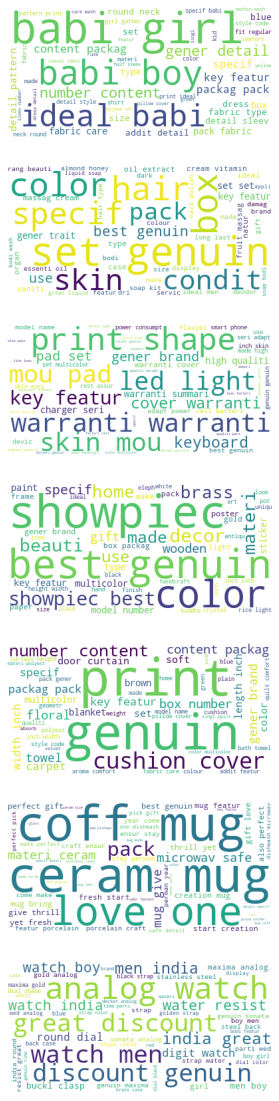

In [133]:
display_wordcloud(corpus_clean_list)

#### Cleaning product_name

In [134]:
raw_corpus = "".join(data_text.product_name.values)
print(raw_corpus[:1_000])
print(len(raw_corpus))

Elegance Polyester Multicolor Abstract Eyelet Door CurtainSathiyas Cotton Bath TowelEurospa Cotton Terry Face Towel SetSANTOSH ROYAL FASHION Cotton Printed King sized Double BedsheetJaipur Print Cotton Floral King sized Double BedsheetMaserati Time R8851116001 Analog Watch  - For BoysCamerii WM64 Elegance Analog Watch  - For Men, BoysT STAR UFT-TSW-005-BK-BR Analog Watch  - For BoysAlfajr WY16B Youth Digital Watch  - For Men, BoysTAG Heuer CAU1116.BA0858 Formula 1 Analog Watch  - For Boys, MenCalibro SW-125 Analog-Digital Watch  - For Men, BoysCartier W6701005 Analog Watch  - For Boys, MenLois Caron LCS-4032 Analog Watch  - For Boys, MenTitan 1639SL03 Analog Watch  - For Boys, MenSrushti Art Jewelry Megnet_Led_Sport_BlackRed1 Digital Watch  - For Men, Women, Boys, GirlsEscort E-1700-906_Blk Analog Watch  - For Men, BoysJack klein BlackLed Digital Watch  - For BoysNorth Moon IW-005-FK Silicone Ion Digital Watch  - For Boys, Girls, WomenFranck Bella FB74C Analog Watch  - For Boys, MenRid

In [135]:
corpus = process_text_1(raw_corpus)
display_tokens_info(corpus)

nb tokens 6191, nb tokens uniques 2531
['elegance', 'polyester', 'multicolor', 'abstract', 'eyelet', 'door', 'curtainsathiyas', 'cotton', 'bath', 'toweleurospa', 'cotton', 'terry', 'face', 'towel', 'setsantosh', 'royal', 'fashion', 'cotton', 'printed', 'king', 'sized', 'double', 'bedsheetjaipur', 'print', 'cotton', 'floral', 'king', 'sized', 'double', 'bedsheetmaserati']
['setsantosh', 'face', 'toweleurospa', 'bedsheetjaipur', 'multicolor', 'abstract', 'elegance', 'bath', 'door', 'polyester', 'towel', 'printed', 'floral', 'eyelet', 'fashion', 'print', 'cotton', 'terry', 'king', 'sized', 'bedsheetmaserati', 'double', 'curtainsathiyas', 'royal']


C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

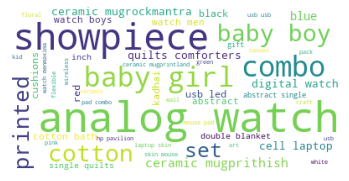

In [136]:
display_wordcloud([corpus])

In [137]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = " ".join(globals()["df_" + str(i)].product_name)


In [138]:
corpus_product_name_0[:1000]

"Sathiyas Cotton Bath Towel Eurospa Cotton Terry Face Towel Set Mom and Kid Baby Girl's Printed Green Top & Pyjama Set Mom and Kid Baby Girl's Printed Blue, Grey Top & Pyjama Set KOHL Wine Bag Yellow CHHOTE JANAB COZY MATTRESS PROTECTOR(SET OF 2) Vitamins Solid Baby Girl's Basic Shorts Vitamins Graphic Print Baby Girl's Basic Shorts Vitamins Embroidered Baby Girl's Denim Shorts florence9 baby cap red checks Cap CHINMAY KIDS Printed Cotton Padded Mosquito Net HEAVENLY Dress Baby Boy's  Combo Bestway 1.47m x 1.47m x 1.22m/Play With Sun Shade Inflatable Play Pool TWISHA Printed Kurti & Salwar FS Mini Klub Baby Boy's Sleepsuit Lollipop Lane Tiddly Wink Safari Bath Set Anthill Baby Boy's, Baby Girl's Bodysuit Toffyhouse Baby Boy's Sleepsuit Earth Conscious Graphic Print Baby Boy's Jumpsuit Poppins Printed Baby Boy's Jumpsuit Babeezworld Baby Boy's Romper cherry crumble california Baby Boy's Dungaree Kandyfloss Baby Boy's, Baby Girl's Romper MKB Baby Girl's Shirt Dress Toddla Baby Girl's Gat

In [139]:
len(corpus_product_name_0)

6137

In [140]:
for i in range(7):
    print("\n\n__Before__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])




__Before__Category__0
nb tokens 6137, nb tokens uniques 69
Sathiyas Cotton Bath Towel Eur
['a', 'u', 'B', 'T', 'l', 'E', 'i', 'y', 'w', 'r', 'e', 'o', 'h', 'n', 'C', ' ', 'S', 't', 's']


__Before__Category__1
nb tokens 7221, nb tokens uniques 74
Burt s Bees Hair Repair Shea A
['p', 'h', 'a', ' ', 'u', 'H', 'r', 'S', 'B', 't', 's', 'A', 'R', 'i', 'e']


__Before__Category__2
nb tokens 7499, nb tokens uniques 72
D-Link DAP1320 RoQ Slim Multim
['P', 'L', 'u', 'l', 'i', 'D', '1', '-', 'A', '3', 'm', 'k', 'o', 'Q', 'n', 'M', ' ', '0', 'S', 't', '2', 'R']


__Before__Category__3
nb tokens 7890, nb tokens uniques 72
Myesquire Ceramic Burner Pot L
['P', 'L', 'a', 'u', 'B', 'i', 'y', 'r', 'e', 'm', 'o', 'n', 'c', 'M', 'C', ' ', 't', 'q', 's']


__Before__Category__4
nb tokens 6503, nb tokens uniques 66
Elegance Polyester Multicolor 
['P', 'n', 'c', 'o', 'a', 'M', ' ', 'u', 'g', 'r', 'y', 't', 's', 'l', 'E', 'i', 'e']


__Before__Category__5
nb tokens 6021, nb tokens uniques 73
Dungri India C

In [141]:
for i in range(7):
    globals()["corpus_product_name_" + str(i)] = process_text_4(globals()["corpus_product_name_" + str(i)],
                                                                rejoin=False,
                                                                list_rare_words=[],
                                                                eng_words=eng_words_stem)

In [142]:
for i in range(7):
    print("\n\n__After__Category__{}".format(str(i)))
    display_tokens_info(globals()["corpus_product_name_" + str(i)])




__After__Category__0
nb tokens 746, nb tokens uniques 249
['cotton', 'bath', 'towel', 'cotton', 'terri', 'face', 'towel', 'set', 'kid', 'babi', 'girl', 'print', 'green', 'top', 'pyjama', 'set', 'kid', 'babi', 'girl', 'print', 'blue', 'grey', 'top', 'pyjama', 'set', 'kohl', 'wine', 'bag', 'yellow', 'cozi']
['face', 'terri', 'kid', 'bath', 'pyjama', 'yellow', 'kohl', 'set', 'towel', 'babi', 'green', 'wine', 'top', 'print', 'cotton', 'girl', 'grey', 'bag', 'cozi', 'blue']


__After__Category__1
nb tokens 731, nb tokens uniques 331
['burt', 'bee', 'hair', 'repair', 'shea', 'grapefruit', 'deep', 'condition', 'suav', 'natur', 'everlast', 'sunshin', 'condition', 'make', 'vaniti', 'case', 'nail', 'polish', 'black', 'lipstick', 'import', 'nail', 'polish', 'black', 'lipstick', 'import', 'scienc', 'dandruff', 'control', 'shampoo']
['grapefruit', 'scienc', 'polish', 'import', 'deep', 'nail', 'control', 'condition', 'case', 'hair', 'make', 'vaniti', 'dandruff', 'everlast', 'bee', 'burt', 'shampoo

In [143]:
corpus_list_product_name = [globals()["corpus_product_name_" + str(i)] for i in range(7)]


C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\ProgramData\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

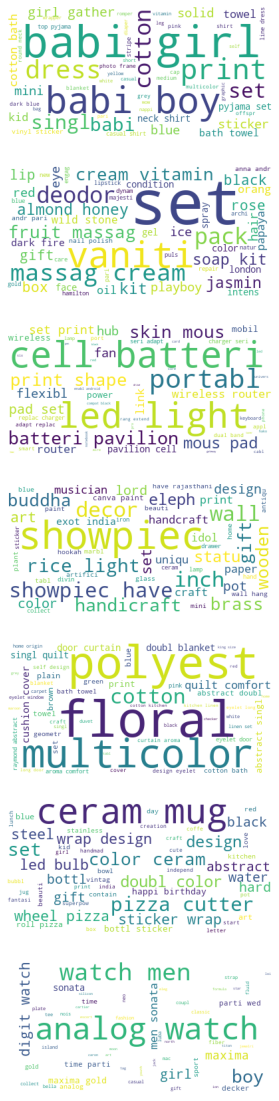

In [144]:
display_wordcloud(corpus_list_product_name)

In [145]:
duplicated_words_set = generate_duplicated_words_list(corpus_list_product_name, n=15)
print(duplicated_words_set)

__Step_1__
__Step_2__
__Step_3__
__Step_4__
__Step_5__
__Step_6__
__Step_7__
__Step_8__
__Step_9__
__Step_10__
__Step_11__
__Step_12__
__Step_13__
__Step_14__
__Step_15__
__Step_16__
__Step_17__
__Step_18__
__Step_19__
__Step_20__
__Step_21__
The length of the list of duplicated words is 16
The length of the set of duplicated words is 11
['towel', 'girl', 'sticker', 'doubl', 'led', 'boy', 'singl', 'set', 'print', 'light', 'cotton']


In [146]:
# idem for 2 times

tmp = pd.Series(corpus).value_counts()
list_max_1_words_product_name = tmp[tmp <= 1]
print(list_max_1_words_product_name[:30])

# save it

list_max_1_words_product_name = list(list_max_1_words_product_name.index)
tmp = pd.DataFrame({"words": list_max_1_words_product_name})
tmp.to_csv(output_path + "product_name_max_1_words.csv", index=False)

carexemex           1
303                 1
38015pl01           1
prabhavali          1
menchappin          1
gtidy               1
multicolorireeya    1
wq18                1
careoxyglow         1
cmantiqueshop       1
blackradhika        1
coral               1
lightsfoolzy        1
98189               1
416                 1
301                 1
womenperucci        1
rked                1
nellson             1
pinkoffspring       1
womenoffspring      1
cnl                 1
qibla               1
toner               1
compass             1
st1025sl07          1
bottleoxyglow       1
rk526               1
elements            1
generation          1
dtype: int64


In [147]:
list_max_1_words_product_name

['carexemex',
 '303',
 '38015pl01',
 'prabhavali',
 'menchappin',
 'gtidy',
 'multicolorireeya',
 'wq18',
 'careoxyglow',
 'cmantiqueshop',
 'blackradhika',
 'coral',
 'lightsfoolzy',
 '98189',
 '416',
 '301',
 'womenperucci',
 'rked',
 'nellson',
 'pinkoffspring',
 'womenoffspring',
 'cnl',
 'qibla',
 'toner',
 'compass',
 'st1025sl07',
 'bottleoxyglow',
 'rk526',
 'elements',
 'generation',
 'watercolors',
 'teal',
 'bodysuitcanon',
 'setsonpra',
 'world',
 'rg',
 'saffron',
 'cartridge',
 'girlslenco',
 'abkl_grn_grn_grnantiqueshop',
 '3003',
 'boysvizion',
 '8502',
 '7purple',
 'girlselantra',
 'tango',
 'dust',
 'plugfogg',
 'covermxofere',
 'store',
 'modish',
 'mb990hn',
 'bdblue',
 'bottleecraftindia',
 'chevron',
 'menmarvel',
 'north',
 'bears',
 'gummy',
 'pineapple',
 'dw100243',
 'mb990ll',
 'dw100405',
 'coupleluba',
 'blackonlinemaniya',
 'figh_008',
 'multicolourfighter',
 'womenbajya',
 'navratri',
 'multicolorsvm',
 'goldrajlaxmi',
 'clues',
 'abkl_pl_pnk_pnkantiquesh

In [148]:
data_text["clean_product_name"] = data_text.product_name.apply(
    lambda x: final_clean(x, process_text_5, "stem", list_max_1_words_product_name, eng_words_stem,
                          []))  # list_max_1_words_product_name duplicated_words_set

In [149]:
data_text.sample(20)

,product_name,text,category,target,clean_text,clean_product_name
254,The Crafts House Showpiece - 6.5 cm,Buy The Crafts House Showpiece - 6.5 cm for ...,Home Decor & Festive Needs,3,craft hous showpiec craft hous showpiec best g...,craft showpiec
739,Buyer's Beach BB349,Buyer's Beach BB349 (Brown) Price: Rs. 449 Sty...,Kitchen & Dining,5,buyer beach brown stylish everi multicolor ind...,buyer
871,Zikrak Exim Floral Cushions Cover,Buy Zikrak Exim Floral Cushions Cover at Rs. 4...,Home Furnishing,4,floral cushion cover genuin,floral cushion cover
586,SF by Sonata 7963PP02 Dean Analog Watch - For...,SF by Sonata 7963PP02 Dean Analog Watch - For...,Watches,6,sonata dean analog watch men sonata dean analo...,sonata analog watch men
469,Ocean CPGW087,Key Features of Ocean CPGW087 Pack of 6 Multip...,Kitchen & Dining,5,key featur ocean pack ocean clear pack ocean g...,
267,Sahara Q Shop Kadhai 1.5 L,Sahara Q Shop Kadhai 1.5 L (Stainless Steel)\r...,Kitchen & Dining,5,sahara shop stainless steel premium non stick ...,sahara
296,I Ball IBCTDC 160/2gb/DDR2 with Dual Core 2 RA...,Specifications of I Ball IBCTDC 160/2gb/DDR2 w...,Computers,2,specif ball dual core ram hard disk do perform...,dual core hard disk
411,Aero Care Blue 4 Lady Combo Set,Flipkart.com: Buy Aero Care Blue 4 Lady Combo ...,Beauty and Personal Care,1,aero care blue ladi set genuin,aero care blue set
271,S C Handicrafts Showpiece - 40 cm,Buy S C Handicrafts Showpiece - 40 cm for Rs...,Home Decor & Festive Needs,3,handicraft showpiec handicraft showpiec best g...,handicraft showpiec
928,Valtellina Checkered Double Blanket Brown,Buy Valtellina Checkered Double Blanket Brown ...,Home Furnishing,4,checker doubl blanket brown genuin,checker doubl blanket brown


In [150]:
sub_data = data_text[data_text.target == 0]

for index, series in sub_data.sample(10).iterrows():
    print("__Before__")
    print(series["product_name"], end="\n\n")
    print("__After__")
    print(series["clean_product_name"], end="\n\n\n")
    print()

__Before__
Mahadev Handicrafts Cotton Cartoon Double Bedsheet

__After__
handicraft cotton cartoon doubl



__Before__
LITTLE FEETZ Baby Girl's Solid Top & Skirt Set

__After__
babi girl solid top set



__Before__
Lollipop Lane Tiddly Wink Safari Bath Set

__After__
lollipop bath set



__Before__
BASRA uepgrn Green Changing Table

__After__
green tabl



__Before__
Piyo Piyo Four Stage Waterproof Bib

__After__
four bib



__Before__
NeedyBee Baby Girl's Layered Dress

__After__
babi girl layer



__Before__
Carter'S Self Design Single Blanket Multicolor

__After__
carter self design singl blanket multicolor



__Before__
next steps Baby Girl's Striped Top & Pyjama Set

__After__
next step babi girl stripe top pyjama set



__Before__
Saba Garments Baby Girl's Gathered Dress

__After__
saba babi girl gather



__Before__
CHINMAY KIDS Printed Cotton Padded Mosquito Net

__After__
kid print cotton net





In [151]:
print("Counting number of words in each row / product")
data_text["_len_clean_text_"] = data_text.clean_text.str.split().apply(len)
data_text["_len_clean_product_name_"] = data_text.clean_product_name.str.split().apply(len)


Counting number of words in each row / product


In [152]:
data_text

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6
...,...,...,...,...,...,...,...,...
1045,Oren Empower Extra Large Self Adhesive Sticker,Oren Empower Extra Large Self Adhesive Sticker...,Baby Care,0,empow extra larg self adhes sticker pack doubl...,extra larg self adhes sticker,215,5
1046,Wallmantra Large Vinyl Sticker Sticker,Wallmantra Large Vinyl Sticker Sticker (Pack o...,Baby Care,0,larg vinyl sticker sticker pack bring home exc...,larg vinyl sticker sticker,135,4
1047,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Baby Care,0,extra larg pigment polyvinyl film import stick...,extra larg sticker,16,3
1048,Wallmantra Medium Vinyl Sticker Sticker,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Baby Care,0,medium vinyl sticker sticker medium vinyl stic...,medium vinyl sticker sticker,10,4


In [153]:
#data_text["_len_clean_text_"].value_counts(normalize=True).plot(kind="pie")

In [154]:
#data_text["_len_clean_text_"].sort_values()
data_text[data_text["_len_clean_text_"] == 0]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='_len_clean_text_'>

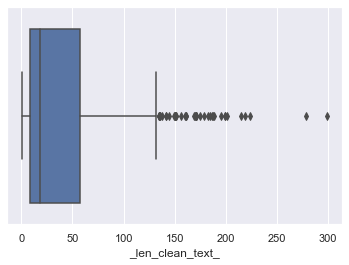

In [155]:
sns.boxplot(data_text["_len_clean_text_"])

In [156]:
data_text[data_text["_len_clean_product_name_"] == 0]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_
59,Brillare Science Dandruff Control Shampoo & In...,Specifications of Brillare Science Dandruff Co...,Beauty and Personal Care,1,specif scienc dandruff control shampoo set set...,,23,0
119,FRENEMY MPAD271 Mousepad,Key Features of FRENEMY MPAD271 Mousepad smoot...,Computers,2,key featur smooth surfac finish move quickli g...,,80,0
243,Suruchi Kadhai 4.5 L,Buy Suruchi Kadhai 4.5 L for Rs.965 online. Su...,Kitchen & Dining,5,best genuin,,2,0
244,Bergner Kadhai NA L,"Bergner Kadhai NA L (Aluminium, Non-stick)\r\n...",Kitchen & Dining,5,aluminium non stick get strong temper glass li...,,51,0
245,Kalash Kadhai 11.5 L,Buy Kalash Kadhai 11.5 L for Rs.1584 online. K...,Kitchen & Dining,5,best genuin,,2,0
246,Peacock Kadhai 3.8 L,Buy Peacock Kadhai 3.8 L for Rs.1155 online. P...,Kitchen & Dining,5,peacock peacock best genuin,,4,0
251,Kalash Kadhai 3.5 L,Buy Kalash Kadhai 3.5 L for Rs.549 online. Kal...,Kitchen & Dining,5,best genuin,,2,0
252,Metallino Kadhai NA L,Buy Metallino Kadhai NA L for Rs.721 online. M...,Kitchen & Dining,5,best genuin,,2,0
255,Jaipan KD2.5 Kadhai 2.5 L,Buy Jaipan KD2.5 Kadhai 2.5 L for Rs.499 onlin...,Kitchen & Dining,5,best genuin,,2,0
259,Nirlon Kadhai 3 L,Buy Nirlon Kadhai 3 L for Rs.785 online. Nirlo...,Kitchen & Dining,5,best genuin,,2,0


We can see that this preprocessing made 42 products with empty values for thei product name.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='_len_clean_product_name_'>

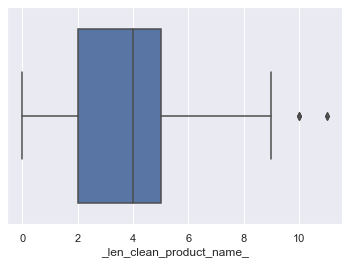

In [157]:
sns.boxplot(data_text["_len_clean_product_name_"])

In [158]:
data_text[(data_text["_len_clean_product_name_"] == 0) & (data_text["_len_clean_text_"] == 0)]

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_


#### We have tried another cleaning method to optimize the use of bag-of-words, BERT and USE.

In [159]:
# another cleaning method
data_text['text_bag-of-words'] = data_text['text'].apply(lambda x : transform_bow_fct(x))
data_text['text_bag-of-words_lem'] = data_text['text'].apply(lambda x : transform_bow_lem_fct(x))
data_text['text_deeplearning'] = data_text['text'].apply(lambda x : transform_dl_fct(x))
data_text.shape

(1050, 11)

In [160]:
data_text['length_bag-of-words'] = data_text['text_bag-of-words'].apply(lambda x : len(word_tokenize(x)))
print("max length bag-of-words : ", data_text['length_bag-of-words'].max())
data_text['length_deeplearning'] = data_text['text_deeplearning'].apply(lambda x : len(word_tokenize(x)))
print("max length deep learning : ", data_text['length_deeplearning'].max())

max length bag-of-words :  379
max length deep learning :  632


In [161]:
data_text.head()

,product_name,text,category,target,clean_text,clean_product_name,_len_clean_text_,_len_clean_product_name_,text_bag-of-words,text_bag-of-words_lem,text_deeplearning,length_bag-of-words,length_deeplearning
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,4,key featur eleg polyest multicolor abstract ey...,eleg polyest multicolor abstract eyelet door,136,6,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,156,248
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,0,specif bath towel bath towel red yellow blue b...,cotton bath towel,49,3,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,63,84
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,0,key featur terri face towel set size small hei...,cotton terri face towel set,118,5,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,158,252
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,4,key featur royal fashion print king size doubl...,royal fashion cotton print king size doubl,89,7,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,114,148
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,4,key featur print floral king size doubl print ...,print cotton floral king size doubl,118,6,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,156,228


In [162]:
# save
data_text.to_csv(output_file, index=False)

In [163]:
# End of notebook time
t1 = time()
print("computing time : {:8.6f} sec".format(t1 - t0))
print("computing time : " + strftime('%H:%M:%S', gmtime(t1 - t0)))

computing time : 703.825537 sec
computing time : 00:11:43
